# **Feature Engineering**

In [1]:
import logging
import pandas as pd
import os
import sys

# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

# Import the load_data module
try:
    from data_loader import load_data
    logger_initialized = True
except ImportError as e:
    logger_initialized = False
    print(f"Error importing 'load_data': {e}")

# Set pandas display options for better visibility
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [2]:
# Configure logging
def setup_logger(name: str = 'my_logger') -> logging.Logger:
    """
    Set up a logger with INFO level and StreamHandler.
    
    Parameters:
    -----------
    name : str
        The name of the logger.
    
    Returns:
    --------
    logging.Logger
        Configured logger instance.
    """
    logger = logging.getLogger(name)
    logger.setLevel(logging.INFO)
    
    # Prevent duplicate handlers
    if not logger.hasHandlers():
        handler = logging.StreamHandler()
        handler.setLevel(logging.INFO)
        formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
        handler.setFormatter(formatter)
        logger.addHandler(handler)
    
    return logger

# Initialize logger
logger = setup_logger()
logger.info("Imported necessary libraries.")

# Check and log if 'load_data' was successfully imported
if logger_initialized:
    logger.info("'load_data' module imported successfully.")
else:
    logger.warning("'load_data' module could not be imported. Check the 'scripts' directory and file availability.")

2025-01-24 15:22:51,335 - INFO - Imported necessary libraries.
2025-01-24 15:22:51,336 - INFO - 'load_data' module imported successfully.


In [3]:
logger.info("🟢 Starting the data loading process...")
df = load_data('../data/data.csv')
if not df.empty:
    logger.info(f"✅ Data loaded successfully! The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")
else:
    logger.warning("⚠️ Data loading completed, but the dataset is empty.")

2025-01-24 15:22:51,349 - INFO - 🟢 Starting the data loading process...
2025-01-24 15:22:51,570 - INFO - ✅ Data loaded successfully! The dataset contains 95662 rows and 15 columns.


Data successfully loaded from '../data/data.csv' with 95662 rows and 15 columns.


In [4]:
# Import the python class for feature engineering
from feature_engineering import FeatureEngineering

# Instantiate the FeatureEngineering class
feature_engineer = FeatureEngineering()

In [5]:
# Identify columns to exclude and categorical columns to encode
cols_to_drop = ['ProductId', 'BatchId', 'AccountId', 'ProviderId', 'SubscriptionId', 'Value', 'CountryCode', 'CurrencyCode']
cat_features = ['ProductCategory', 'ChannelId']

# Drop unnecessary columns
df.drop(columns=cols_to_drop, inplace=True)

In [6]:
if __name__ == '__main__':
    print("🟢 Starting feature engineering process...")
    print("===============================================")

    # Create aggregate features
    df_copy = df.copy().reset_index()
    agg_features = feature_engineer.create_aggregate_features(df_copy)
    print("Aggregate features created.")
    print("===============================================")
    # Extract time features
    df_with_time_features = feature_engineer.extract_time_features(agg_features)
    print("Time features extracted.")
    print("===============================================")
    # Encode categorical features
    df_encoded = feature_engineer.encode_categorical_features(df_with_time_features, cat_features)
    print("Categorical features encoded.")
    print("===============================================")
    # Handle missing values
    df_cleaned = feature_engineer.handle_missing_values(df_encoded)
    print("Missing values handled.")
    print("===============================================")
    # Normalize numerical features
    numeric_cols = df_encoded.select_dtypes(include='number').columns
    exclude_cols = ['Amount', 'FraudResult']  # Replace with actual column names to exclude
    numeric_cols = numeric_cols.difference(exclude_cols)

    df_normalized = feature_engineer.normalize_numerical_features(df_encoded, numeric_cols, method='standardize')
    print("✅ Numerical features normalized.")
    print("===============================================")


🟢 Starting feature engineering process...
Aggregate features created.
Time features extracted.
Categorical features encoded.
Missing values handled.
✅ Numerical features normalized.


In [7]:
# Display the results
df_normalized

,CustomerId,ProductCategory,ChannelId,Amount,TransactionStartTime,PricingStrategy,FraudResult,Total_Transaction_Amount,Average_Transaction_Amount,Transaction_Count,Std_Transaction_Amount,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Year
TransactionId,,,,,,,,,,,,,,,
TransactionId_76871,CustomerId_4406,-0.799047,0.746738,1000.0,2018-11-15 02:18:49+00:00,-0.349252,0.0,0.170118,-0.067623,-0.311831,-0.168551,-2.155530,-0.100739,0.848684,-0.994246
TransactionId_73770,CustomerId_4406,0.491064,-1.175144,-20.0,2018-11-15 02:19:08+00:00,-0.349252,0.0,0.170118,-0.067623,-0.311831,-0.168551,-2.155530,-0.100739,0.848684,-0.994246
TransactionId_26203,CustomerId_4683,-0.799047,0.746738,500.0,2018-11-15 02:44:21+00:00,-0.349252,0.0,0.165122,-0.072568,-0.444993,-0.202748,-2.155530,-0.100739,0.848684,-0.994246
TransactionId_380,CustomerId_988,4.361398,0.746738,20000.0,2018-11-15 03:32:55+00:00,-0.349252,0.0,0.175567,-0.008155,-0.404020,-0.009754,-1.949214,-0.100739,0.848684,-0.994246
TransactionId_28195,CustomerId_988,0.491064,-1.175144,-644.0,2018-11-15 03:34:21+00:00,-0.349252,0.0,0.175567,-0.008155,-0.404020,-0.009754,-1.949214,-0.100739,0.848684,-0.994246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TransactionId_89881,CustomerId_3078,0.491064,-1.175144,-1000.0,2019-02-13 09:54:09+00:00,-0.349252,0.0,0.276904,-0.028743,0.204885,0.050775,-0.711319,-0.323884,-0.874040,1.005787
TransactionId_91597,CustomerId_3874,-0.799047,0.746738,1000.0,2019-02-13 09:54:25+00:00,-0.349252,0.0,0.167759,-0.062526,-0.398330,-0.177178,-0.711319,-0.323884,-0.874040,1.005787
TransactionId_82501,CustomerId_3874,0.491064,-1.175144,-20.0,2019-02-13 09:54:35+00:00,-0.349252,0.0,0.167759,-0.062526,-0.398330,-0.177178,-0.711319,-0.323884,-0.874040,1.005787


In [8]:
# Display normalized Columns
df_normalized.columns

Index(['CustomerId', 'ProductCategory', 'ChannelId', 'Amount',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult',
       'Total_Transaction_Amount', 'Average_Transaction_Amount',
       'Transaction_Count', 'Std_Transaction_Amount', 'Transaction_Hour',
       'Transaction_Day', 'Transaction_Month', 'Transaction_Year'],
      dtype='object')

In [9]:
# Save extracted and cleaned features to CSV
df_normalized.to_csv('../data/extracted_features.csv', index=False)
print("✅ Extracted features saved to '../data/extracted_features.csv'.")

✅ Extracted features saved to '../data/extracted_features.csv'.


### **Feature Engineering Process**

The feature engineering process involves several key steps to prepare the dataset for analysis and model training:

#### **Steps Involved**

1. **Encoding Categorical Variables**:
   - Categorical variables were encoded using one-hot encoding to convert them into a numerical format suitable for machine learning algorithms.

2. **Standardizing Numerical Features**:
   - Numerical features were standardized using the `StandardScaler`. This ensures consistency in scale across features, which is crucial for many machine learning models.

3. **Handling Missing Values**:
   - During the feature engineering process, the new feature `Std_Transaction_Amount` was found to have **712 missing values**. To ensure data completeness, these missing values were imputed with the mean of the feature.

#### **Summary**

These steps improve the quality of the dataset, making it more suitable for further analysis and predictive modeling. Proper encoding, scaling, and handling of missing values are essential for building effective machine learning models.

### **Default estimator and WoE binning**

##### **RFM Model**

The RFM model is a classic customer stratification technique that segments customer groups based on three key dimensions:

- **Recency**: How recently a customer made a purchase.
- **Frequency**: How often a customer makes a purchase.
- **Monetary**: How much money a customer spends.

#### **Steps to Implement**

1. **Data Preparation**:
   - Ensure the transaction data includes key columns: `TransactionId`, `CustomerId`, `TransactionStartTime`, and `Amount`.

2. **Calculate Last Access Date**:
   - Determine the most recent transaction date for each customer.

3. **Calculate RFM Scores**:
   - Compute the RFM metrics based on the defined formulas for Recency, Frequency, and Monetary values.

In [10]:
# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

from credit_scoring_model import CreditScoreRFM
# Initialize RFMS object
rfm = CreditScoreRFM(df_normalized.reset_index())

**Step 1**: Calculate Recency, Frequency, and Monetary

In [11]:
# Step 1: Calculate Recency, Frequency, and Monetary
rfm_df = rfm.calculate_rfm()

# Display the first five rows
rfm_df[['CustomerId', 'Recency', 'Frequency', 'Monetary']].head()

,CustomerId,Recency,Frequency,Monetary
0,CustomerId_4406,2173,119,109921.75
2,CustomerId_4683,2253,2,1000.00
3,CustomerId_988,2177,38,228727.20
5,CustomerId_1432,2262,1,2000.00
6,CustomerId_2858,2177,29,93400.00


**Visualize the RFM variables**

Starting RFM visualizations...
Generating pairplot...


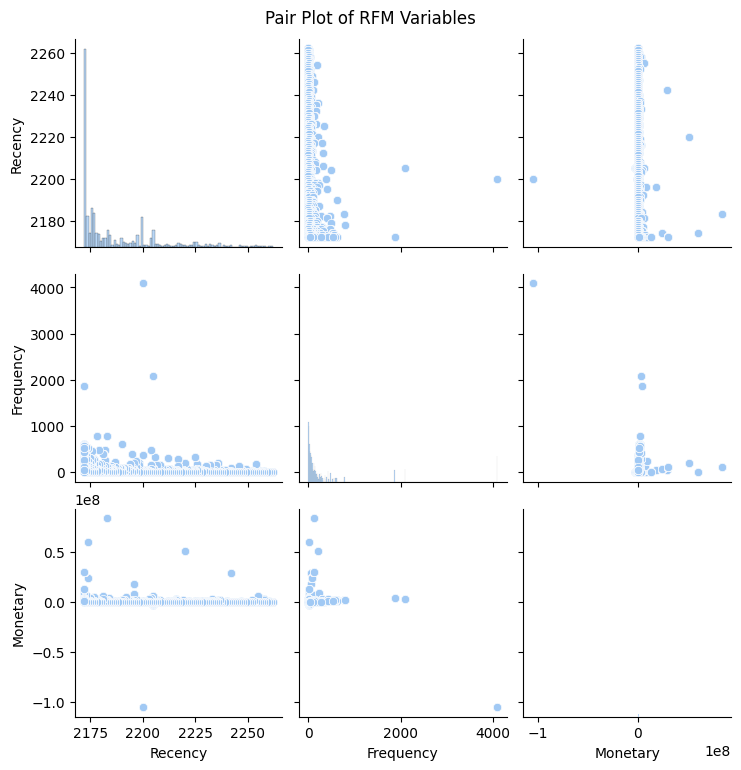

Pairplot generated successfully.

Generating heatmap...


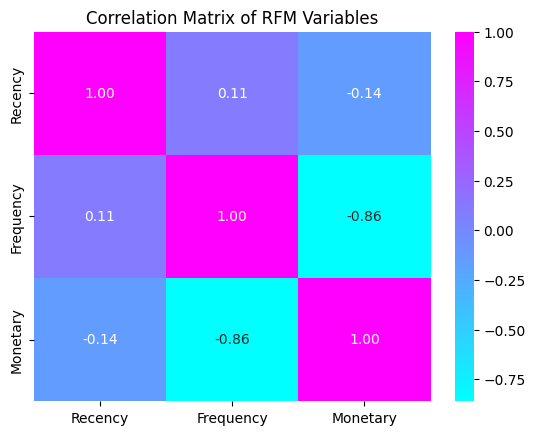

Heatmap generated successfully.

Generating histograms...


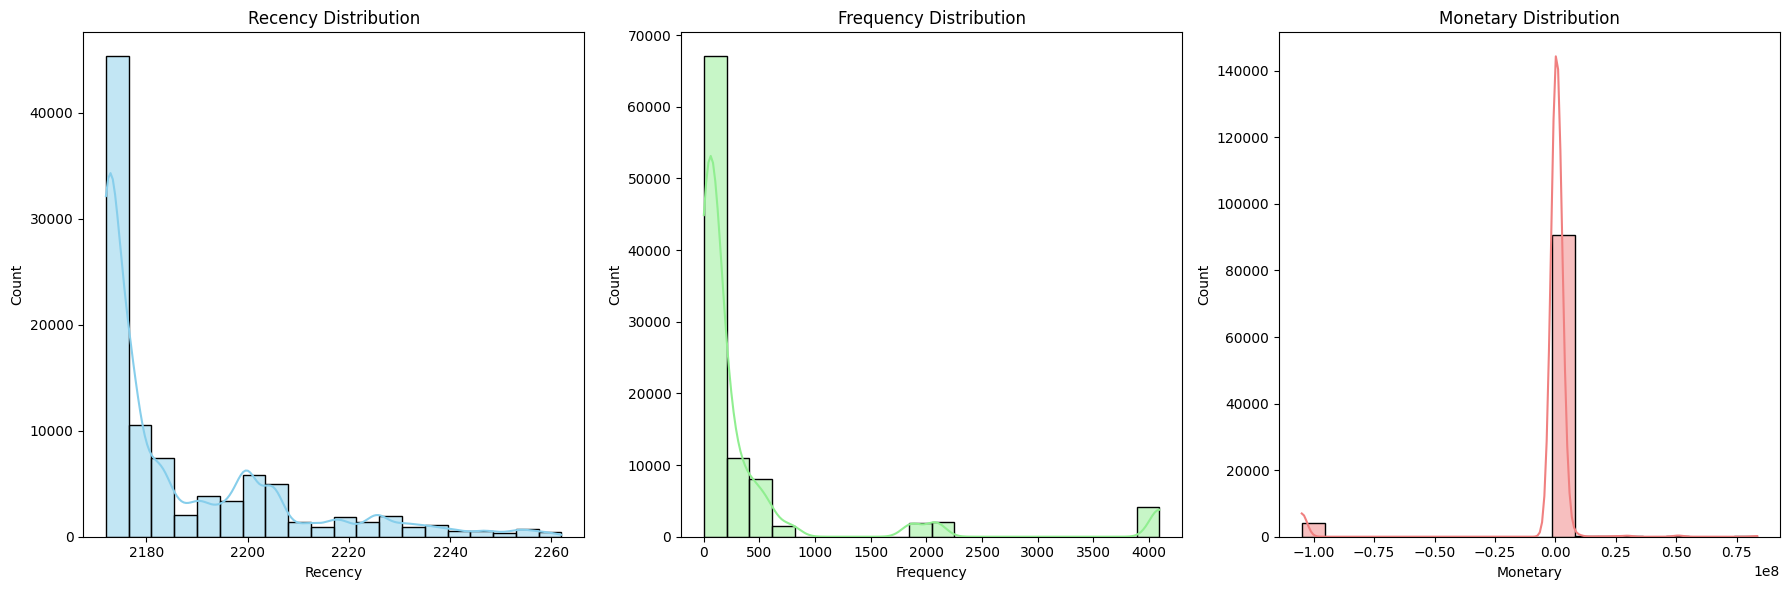

Histograms generated successfully.

All visualizations completed.


In [12]:
# Define a function to call and organize RFMS visualizations
def visualize_rfm_data(rfm):
    """
    Function to visualize RFM data comprehensively.
    
    Parameters:
    - rfm (CreditScoreRFM): The CreditScoreRFM object containing RFM data and visualization methods.
    
    Visualizations:
    1. Pairplot: Displays relationships between 'Recency', 'Frequency', 'Monetary', and 'Risk_Level'.
    2. Heatmap: Provides a correlation matrix for the dataset.
    3. Histograms: Shows the distribution of RFM metrics.
    """
    print("Starting RFM visualizations...")
    try:
        print("Generating pairplot...")
        rfm.plot_pairplot()  # Plot relationships between R, F, M, and risk level
        print("Pairplot generated successfully.\n")
        
        print("Generating heatmap...")
        rfm.plot_heatmap()  # Plot heatmap for correlations
        print("Heatmap generated successfully.\n")
        
        print("Generating histograms...")
        rfm.plot_histograms()  # Plot distributions of metrics
        print("Histograms generated successfully.\n")
        
        print("All visualizations completed.")
    except AttributeError as e:
        print(f"AttributeError: {e}. Ensure that 'Recency', 'Frequency', 'Monetary', and 'Risk_Level' are defined in rfms_df.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

# Call the function to visualize the data
visualize_rfm_data(rfm)
